# Titanic Survival Prediction - Jupyter Notebook

## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

## Step 2: Load Dataset

In [2]:
df = pd.read_csv("tested.csv")

In [3]:
# Display first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Display last few rows of the dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
print(df.shape)

(418, 12)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Step 3: Data Preprocessing

### Handling Missing Values

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
# Drop 'Cabin' column due to excessive missing values
df = df.drop(columns=['Cabin'])

In [11]:
# Fill missing values in 'Age' and 'Fare' with median values
imputer = SimpleImputer(strategy='median')
df[['Age', 'Fare']] = imputer.fit_transform(df[['Age', 'Fare']])

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Encoding Categorical Variables

In [13]:
# Convert categorical features into numeric format
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])  # Male: 1, Female: 0
df['Embarked'] = label_enc.fit_transform(df['Embarked'])

### Normalize Numerical Features

In [14]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [15]:
# Verify the scaling
print(df[['Age', 'Fare']].head())

        Age      Fare
0  0.386231 -0.497413
1  1.371370 -0.512278
2  2.553537 -0.464100
3 -0.204852 -0.482475
4 -0.598908 -0.417492


## Step 4: Data Splitting

In [16]:
# Select features and target
X = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'])
y = df['Survived']


In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 5: Train Machine Learning Model

In [18]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Step 6: Model Evaluation

In [19]:
# Make predictions
y_pred = model.predict(X_test)


In [20]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [21]:
# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Model Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



## Step 7: Data Visualization


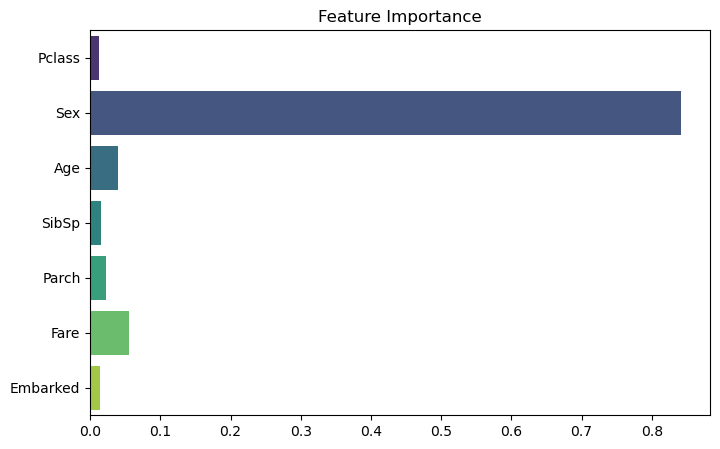

In [22]:
# Plot feature importance
feature_importance = model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=X.columns, palette='viridis')
plt.title("Feature Importance")
plt.show()

In [23]:
import os
import joblib

# Create directory if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the trained model
model_path = "titanic_model.pkl"
joblib.dump(model, model_path)
print(f"Model saved at {model_path}")


Model saved at titanic_model.pkl


In [24]:
# Create directory if it doesn't exist
os.makedirs("results", exist_ok=True)

# Save accuracy and classification report
with open("results/model_performance.txt", "w") as f:
    f.write(f"Model Accuracy: {accuracy:.4f}\n")
    f.write("Classification Report:\n")
    f.write(report)
print("Model performance saved in results/model_performance.txt")


Model performance saved in results/model_performance.txt
